In [57]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pyocr

In [59]:
tools = pyocr.get_available_tools()
tool = tools[0]

In [6]:
img=cv2.imread('D:\\Project\\Data File\\index_01.webp')

In [7]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')
    
    ax.imshow(im_data, cmap='gray')

    plt.show()

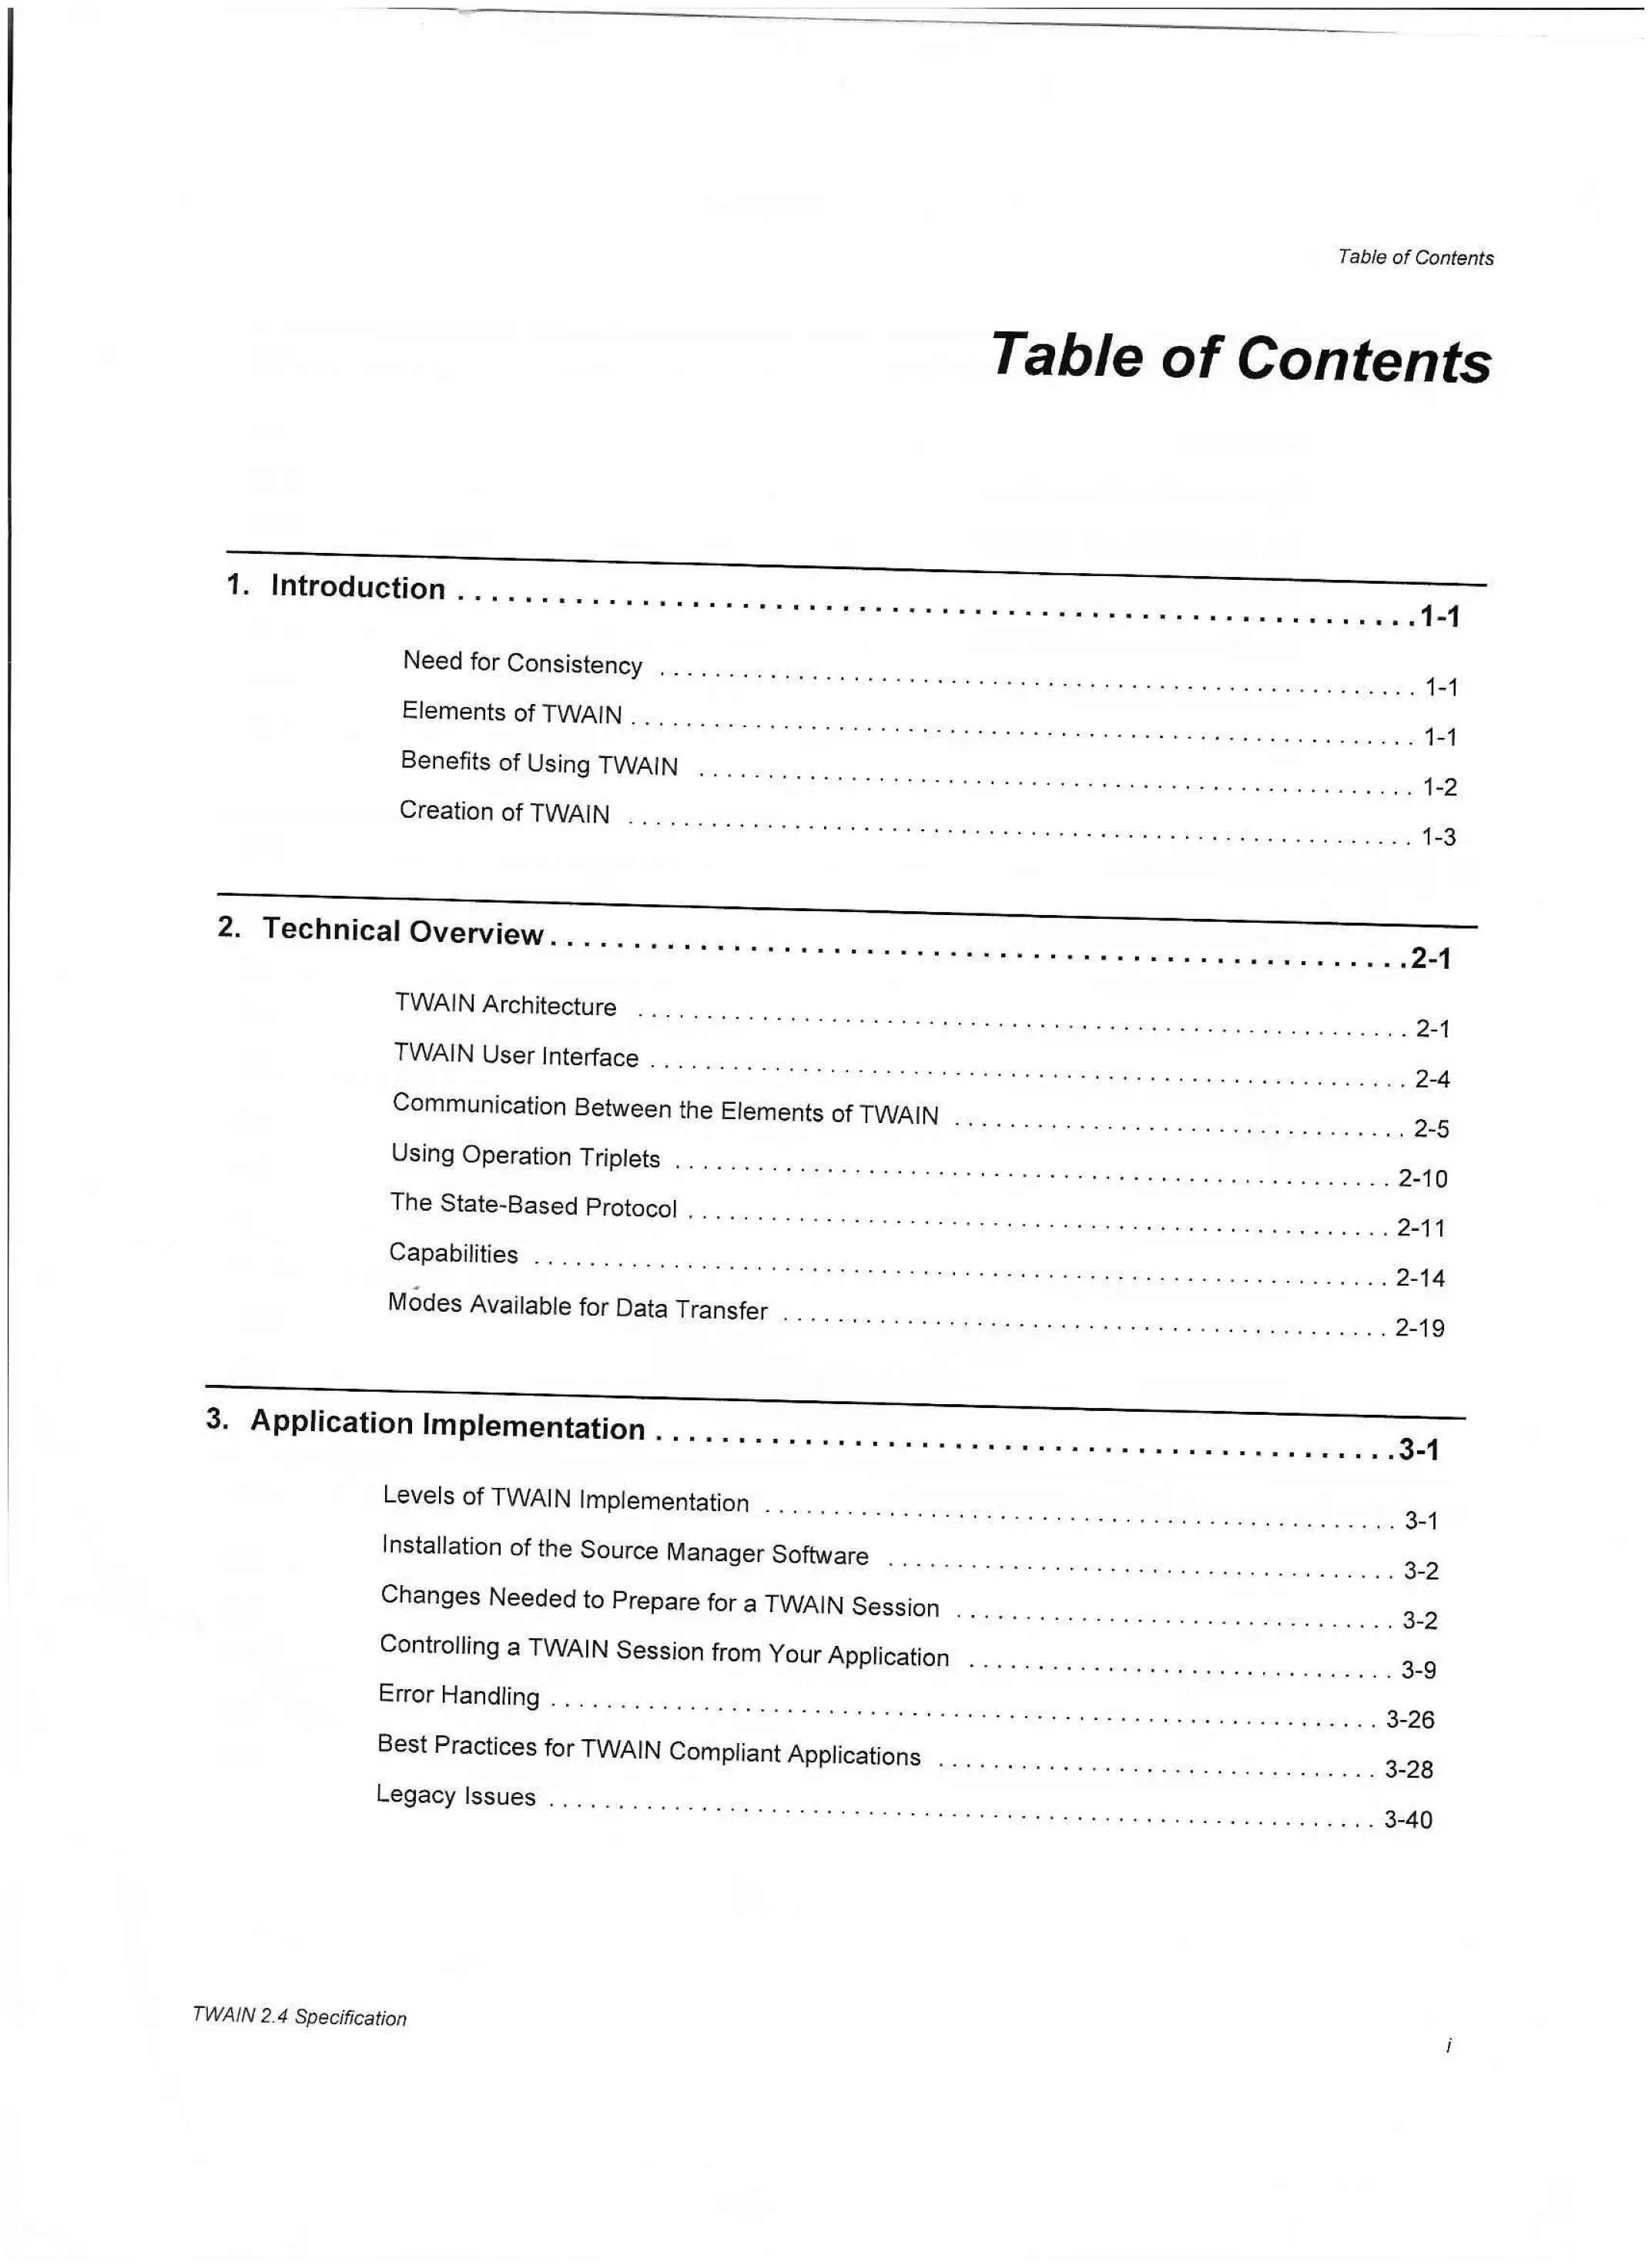

In [9]:
display('D:\\Project\\Data File\\index_01.webp')

In [26]:
def deskew(cvImage):
    gray = cv2.cvtColor(cvImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    largestContour = contours[0]

    minAreaRect = cv2.minAreaRect(largestContour)
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle

    (h, w) = cvImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotatedImage = cv2.warpAffine(cvImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotatedImage

In [27]:
straight=deskew(img)
cv2.imwrite('D:\\Project\\Data File\\Straight Image.jpg',straight)

True

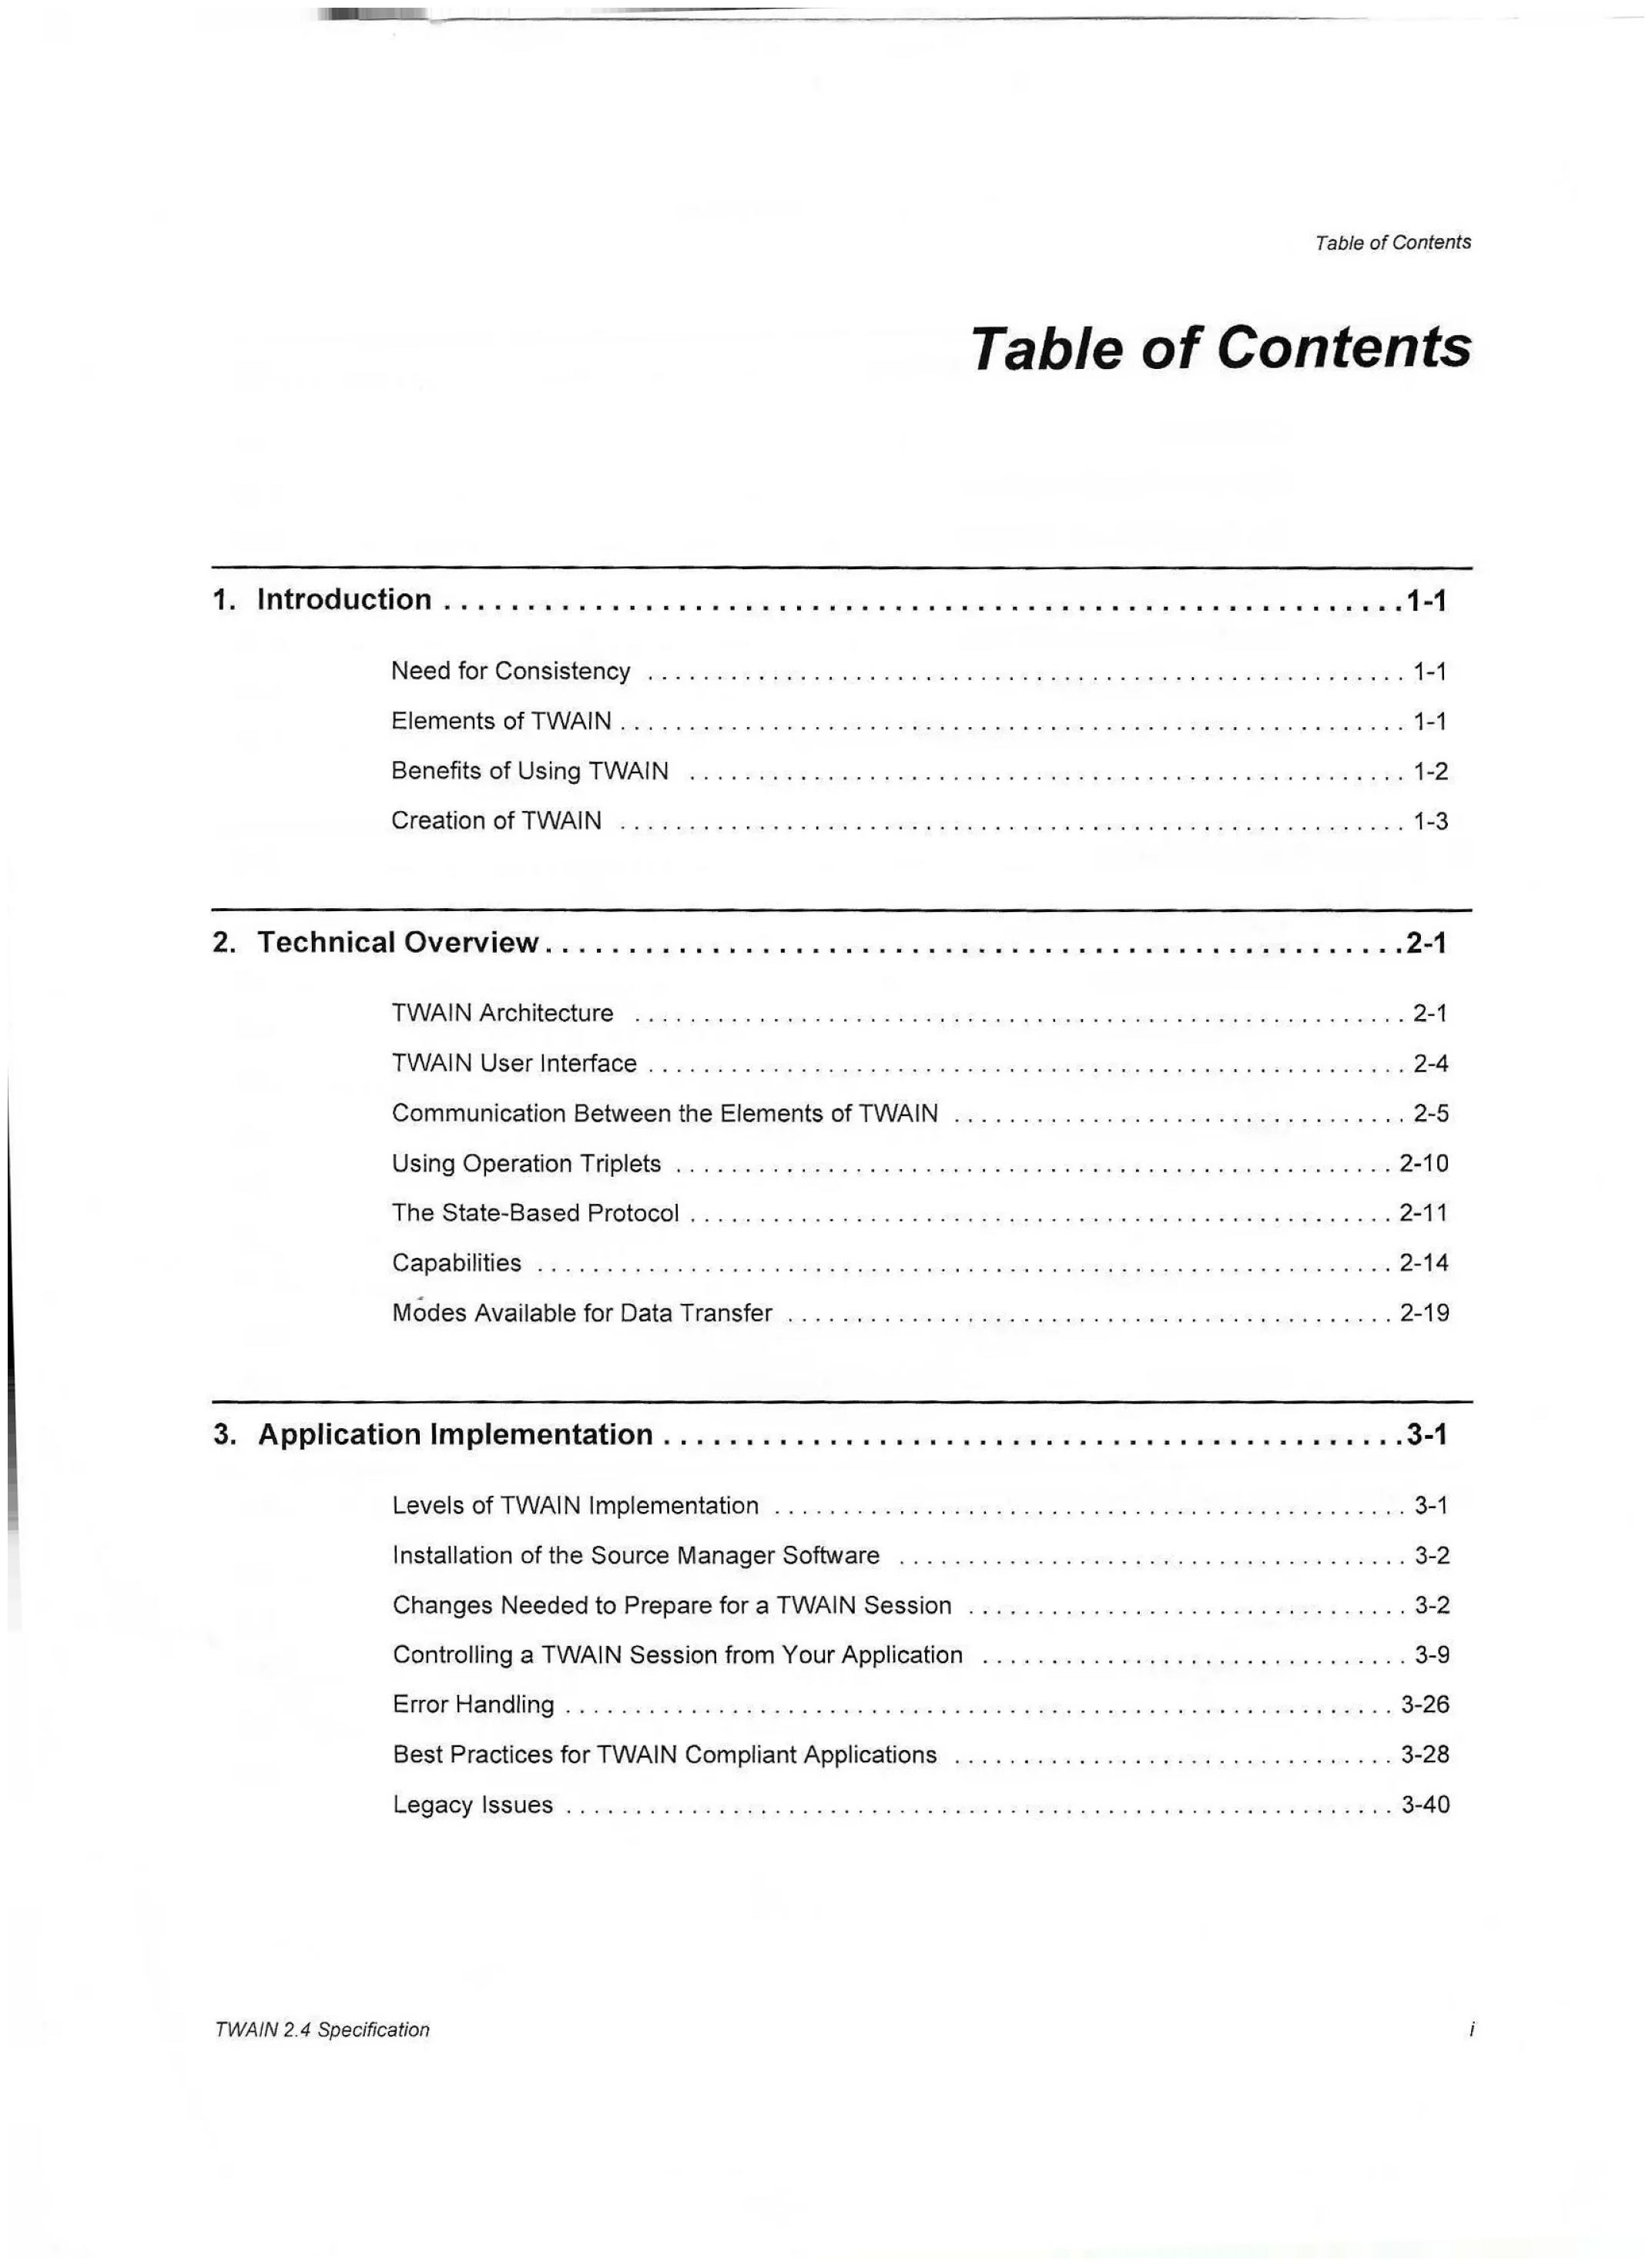

In [28]:
display("D:\\Project\\Data File\\Straight Image.jpg")

In [31]:
grey=cv2.cvtColor(straight,cv2.COLOR_BGR2GRAY)
cv2.imwrite('D:\\Project\\Data File\\Ind_Grey.jpg',grey)

True

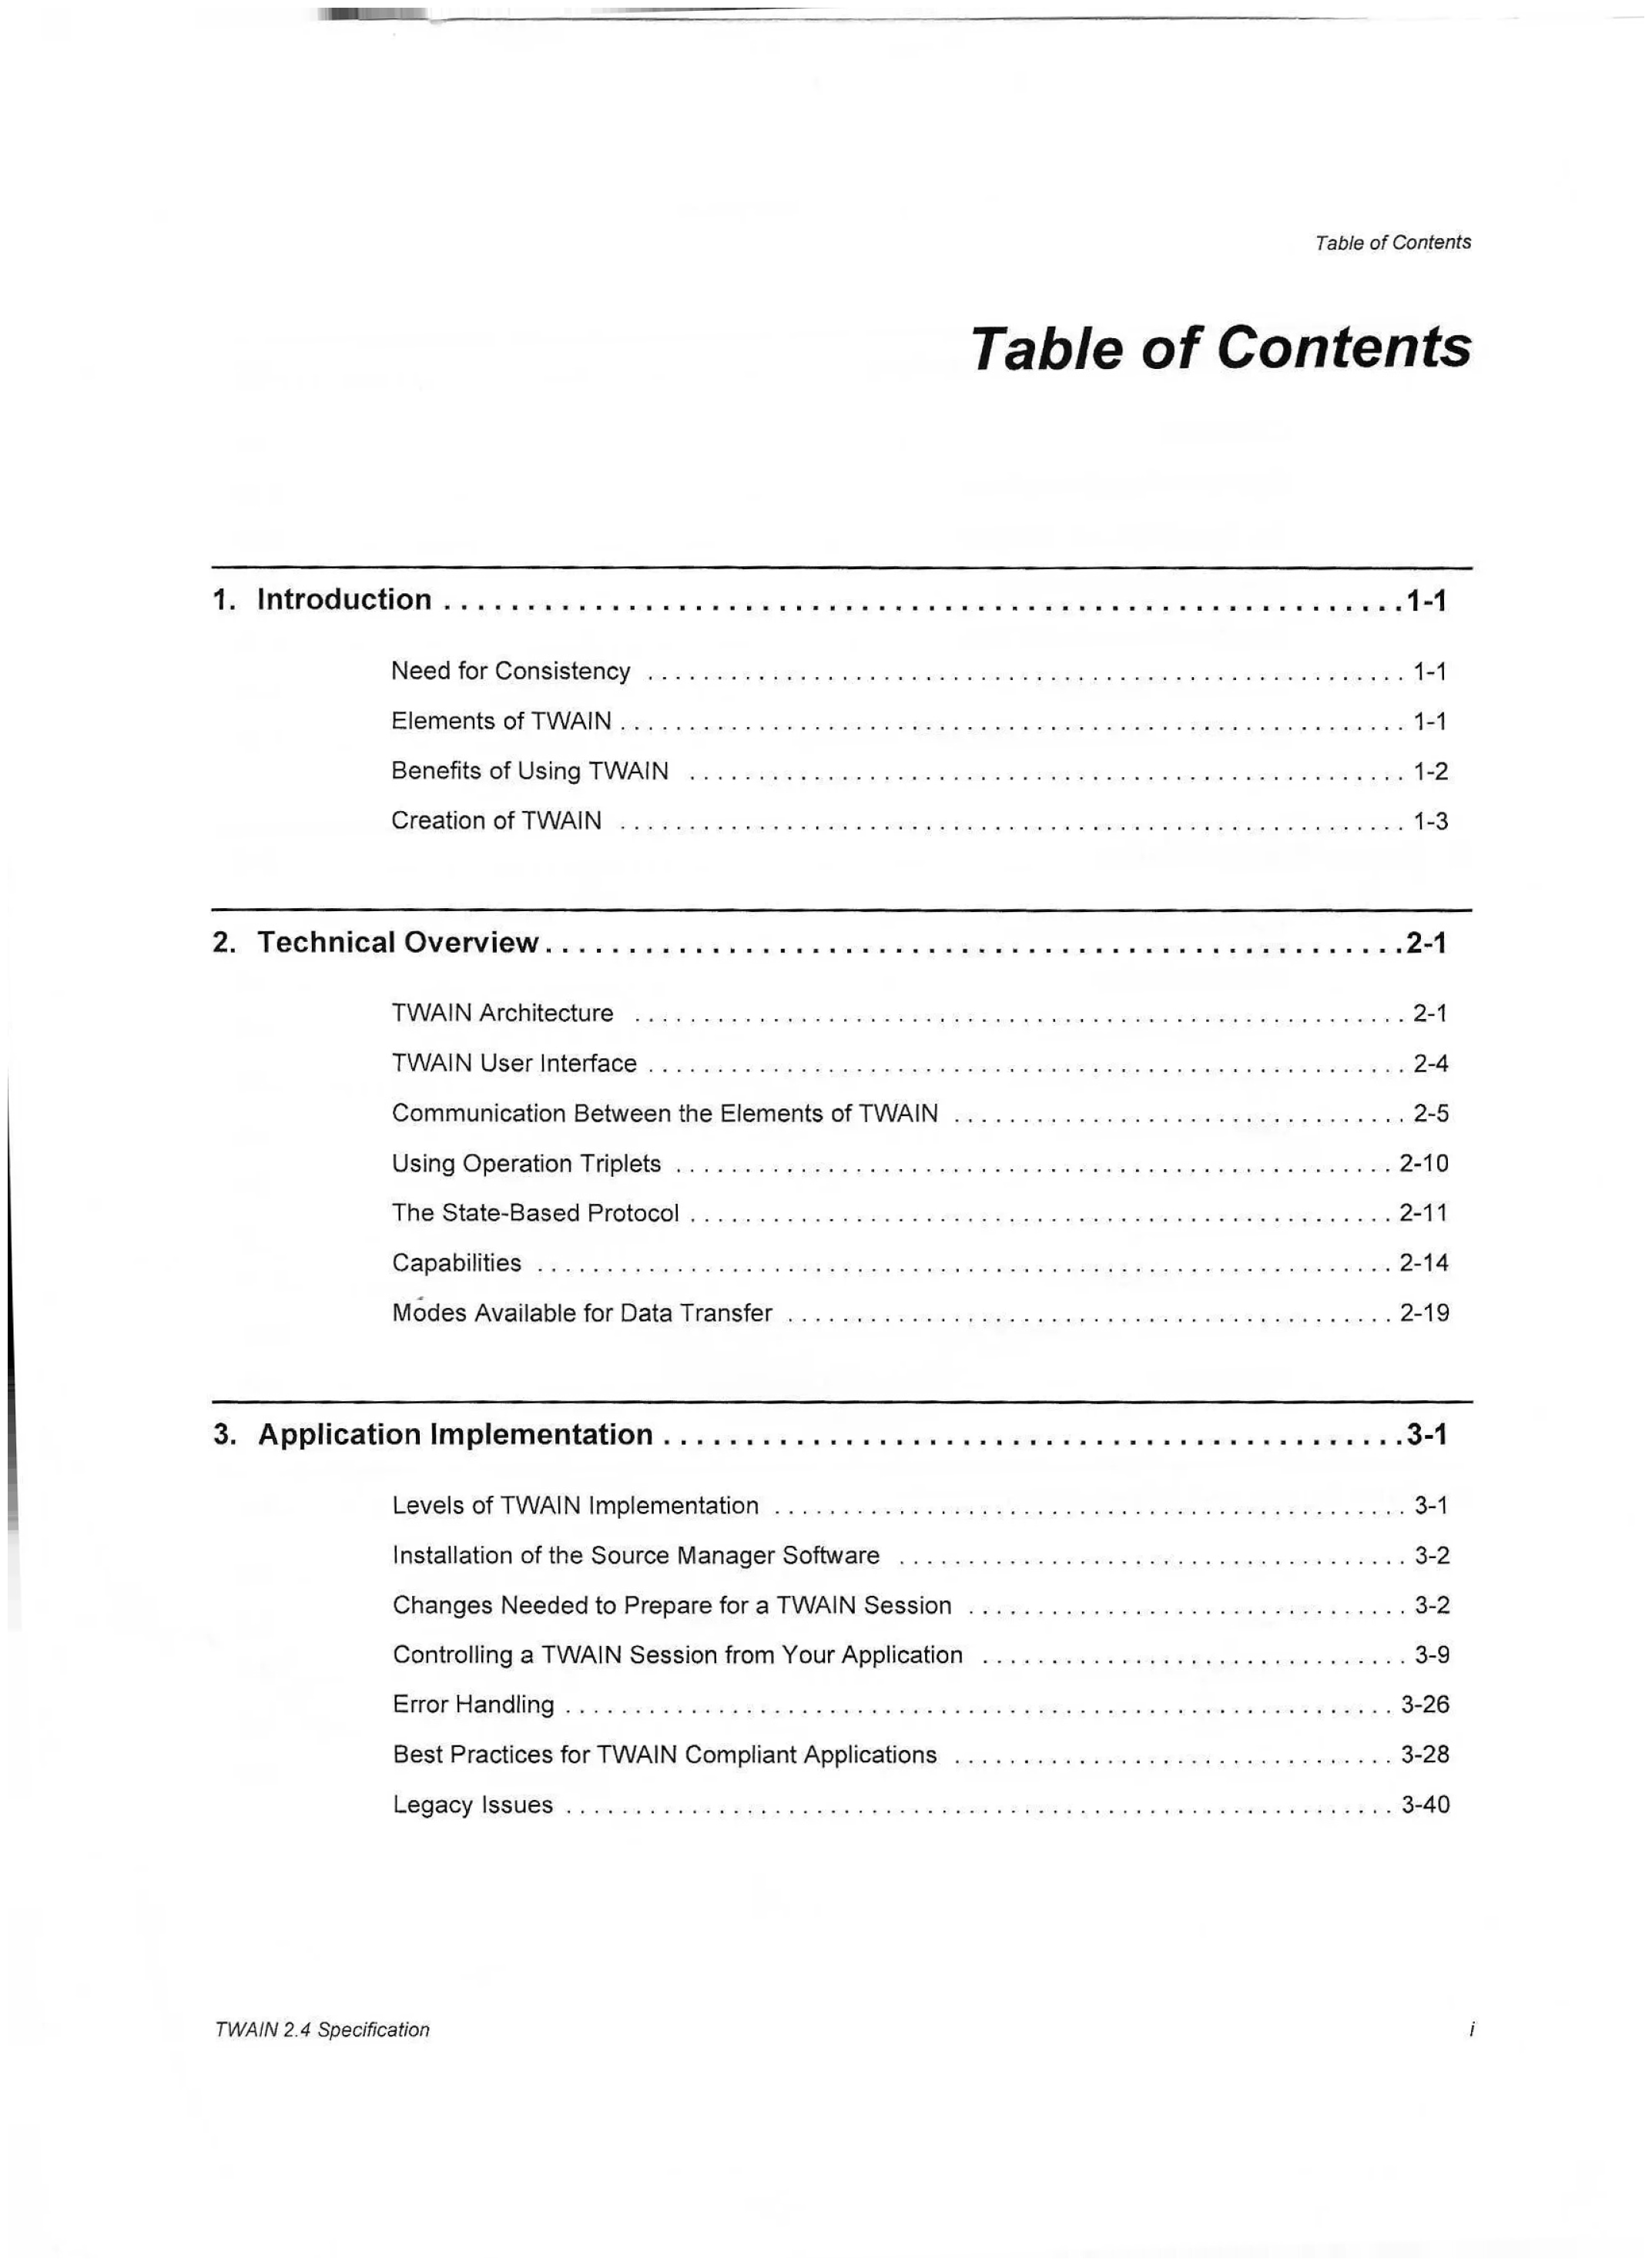

In [32]:
display('D:\\Project\\Data File\\Ind_Grey.jpg')

In [73]:
blur=cv2.GaussianBlur(grey,(5,5),0)
cv2.imwrite('D:\\Project\\Data File\\Ind_Blur.jpg',blur)

True

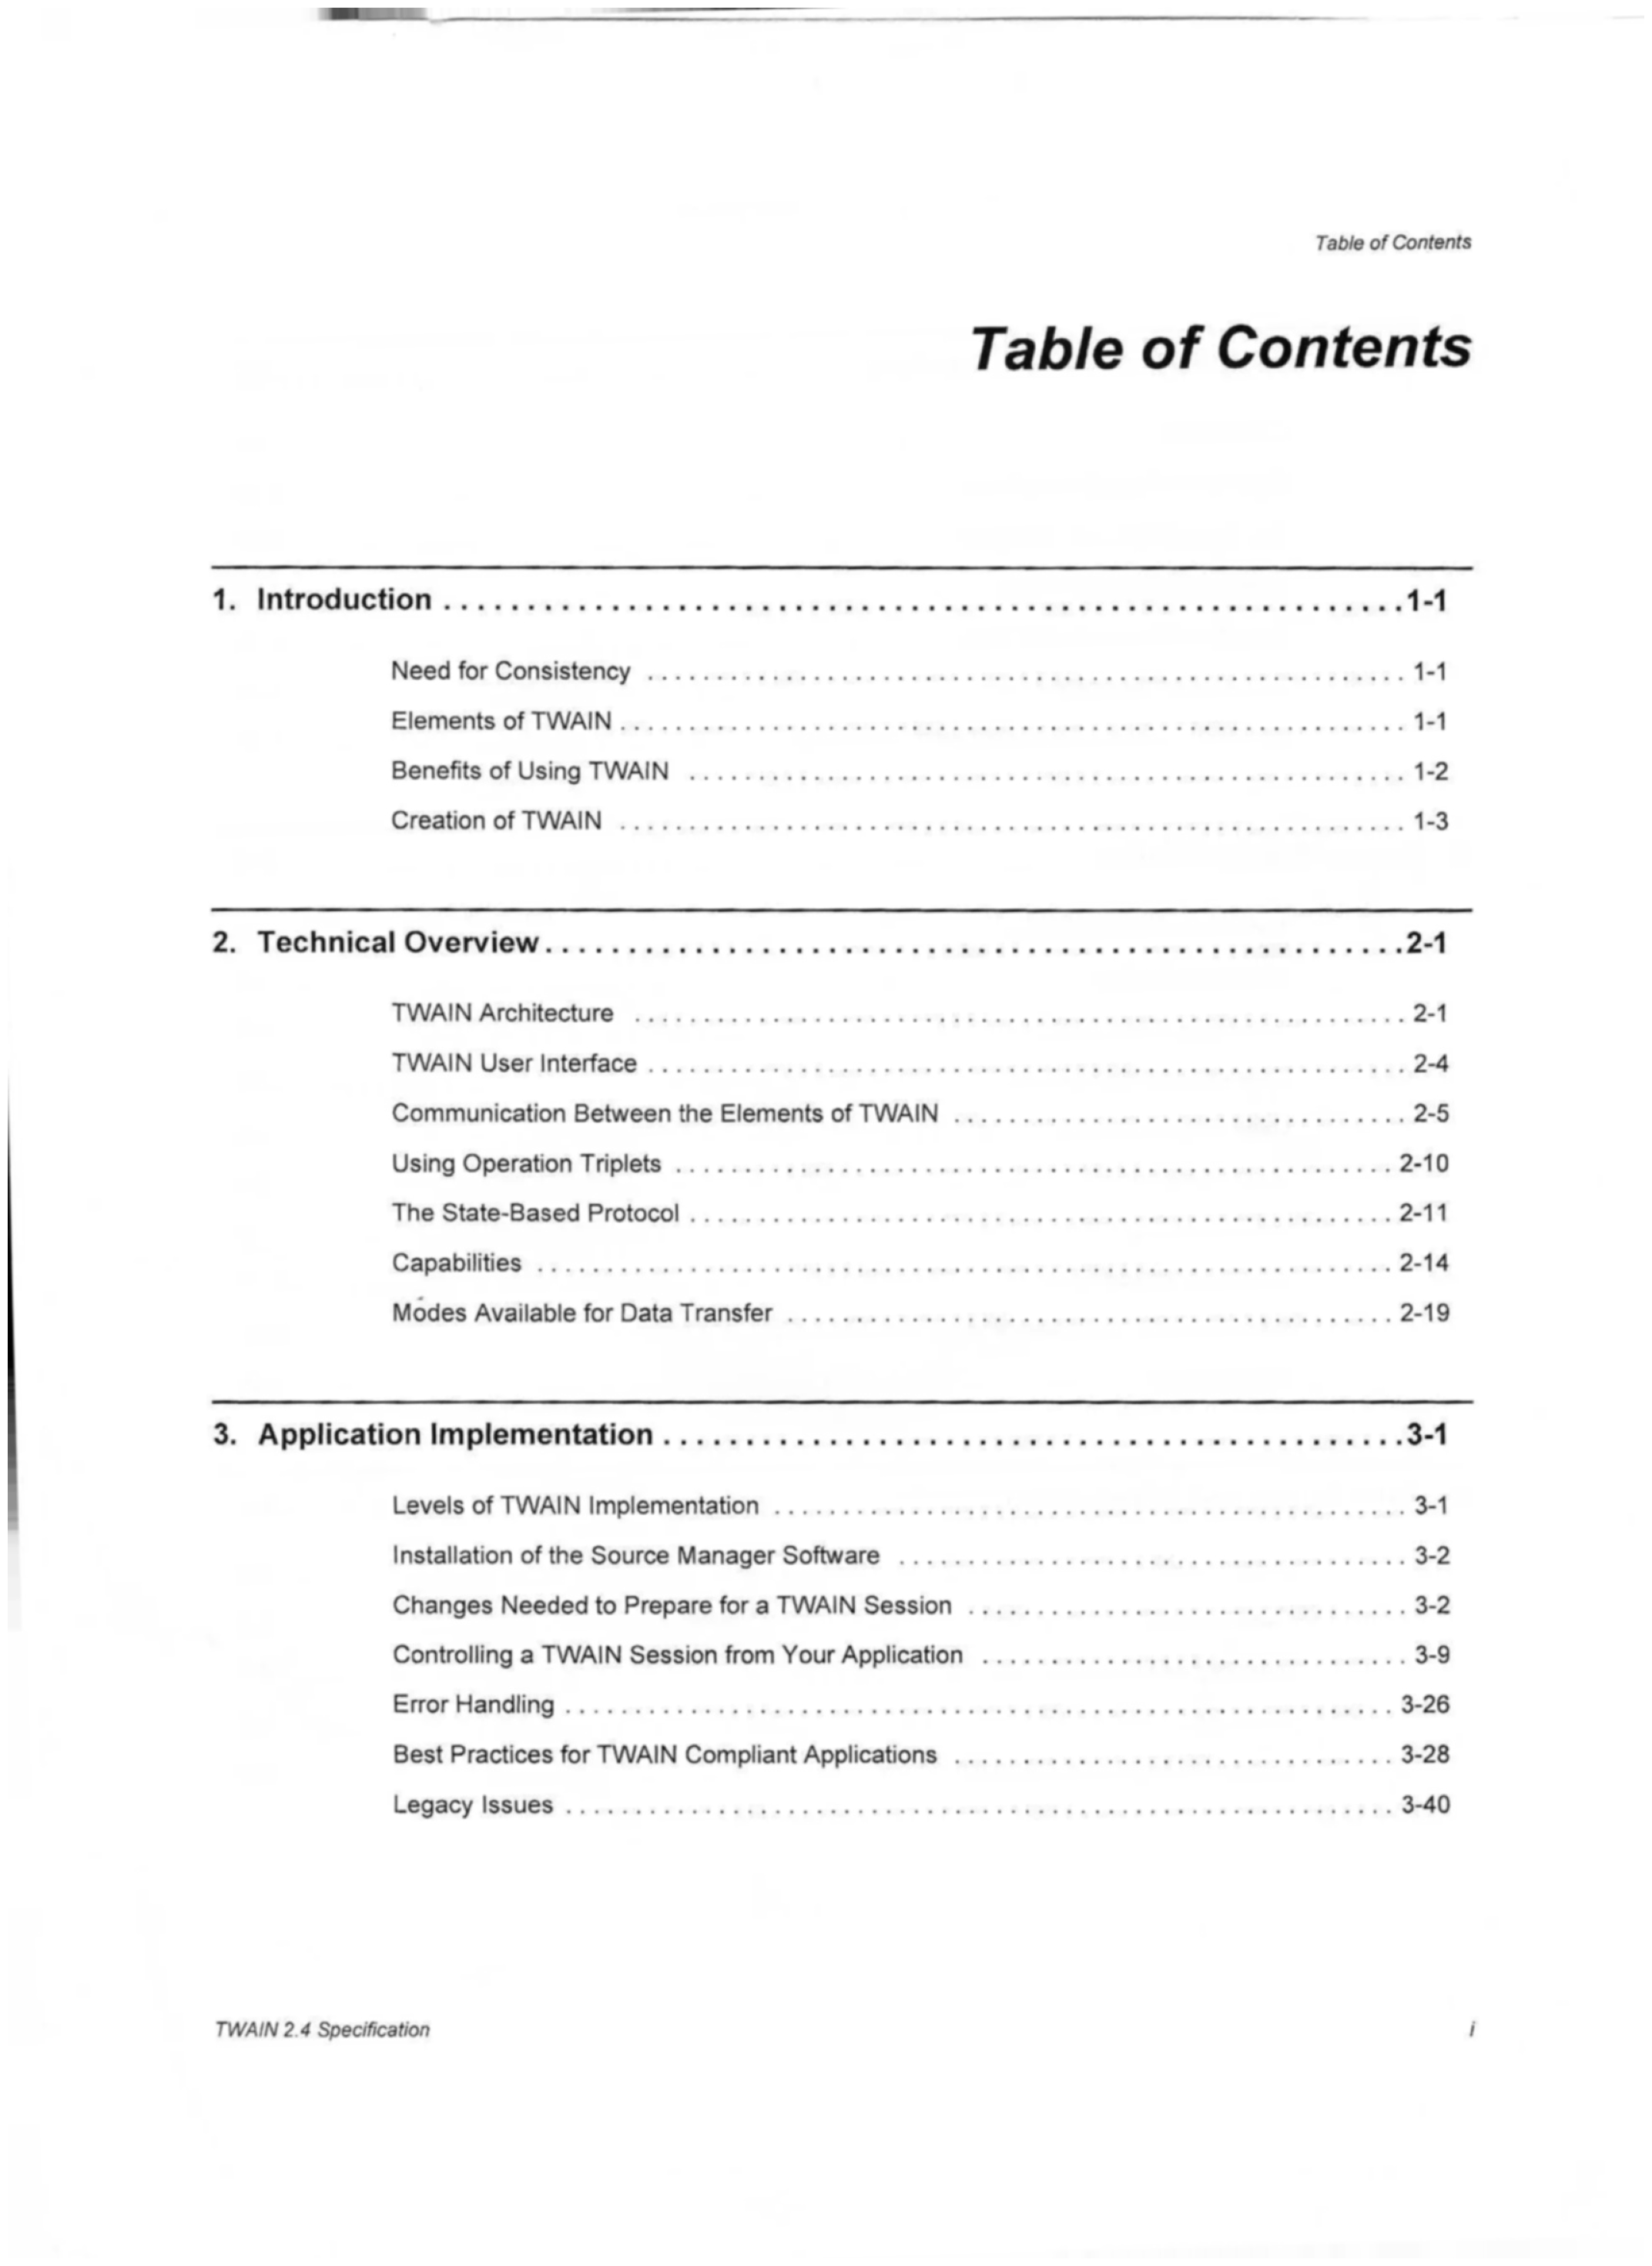

In [74]:
display('D:\\Project\\Data File\\Ind_Blur.jpg')

In [75]:
edge=cv2.Canny(blur,50,150)

In [76]:
contours,_=cv2.findContours(edge,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [84]:
for c in contours:
    x,y,w,h=cv2.boundingRect(c)
    roi = thresh[y:y+h, x:x+w]
    cv2.rectangle(straight,(x,y),(x+w,y+h),(0,255,0),1)
    print(f"Bounding Box Location: (x={x}, y={y}, w={w}, h={h})")

cv2.imwrite('D:\\Project\\Data File\\Index_Bbox.jpg',straight)

Bounding Box Location: (x=297, y=2105, w=5, h=4)
Bounding Box Location: (x=241, y=2103, w=1, h=1)
Bounding Box Location: (x=338, y=2099, w=5, h=7)
Bounding Box Location: (x=383, y=2096, w=22, h=13)
Bounding Box Location: (x=271, y=2096, w=1, h=1)
Bounding Box Location: (x=304, y=2093, w=11, h=15)
Bounding Box Location: (x=358, y=2092, w=27, h=17)
Bounding Box Location: (x=322, y=2092, w=36, h=20)
Bounding Box Location: (x=287, y=2092, w=11, h=17)
Bounding Box Location: (x=266, y=2092, w=16, h=16)
Bounding Box Location: (x=246, y=2092, w=21, h=17)
Bounding Box Location: (x=1518, y=2091, w=7, h=17)
Bounding Box Location: (x=406, y=2091, w=33, h=18)
Bounding Box Location: (x=216, y=2091, w=33, h=17)
Bounding Box Location: (x=1289, y=1873, w=4, h=3)
Bounding Box Location: (x=1260, y=1873, w=4, h=3)
Bounding Box Location: (x=1159, y=1873, w=4, h=3)
Bounding Box Location: (x=1115, y=1873, w=4, h=3)
Bounding Box Location: (x=827, y=1873, w=4, h=4)
Bounding Box Location: (x=798, y=1873, w=4, h

True

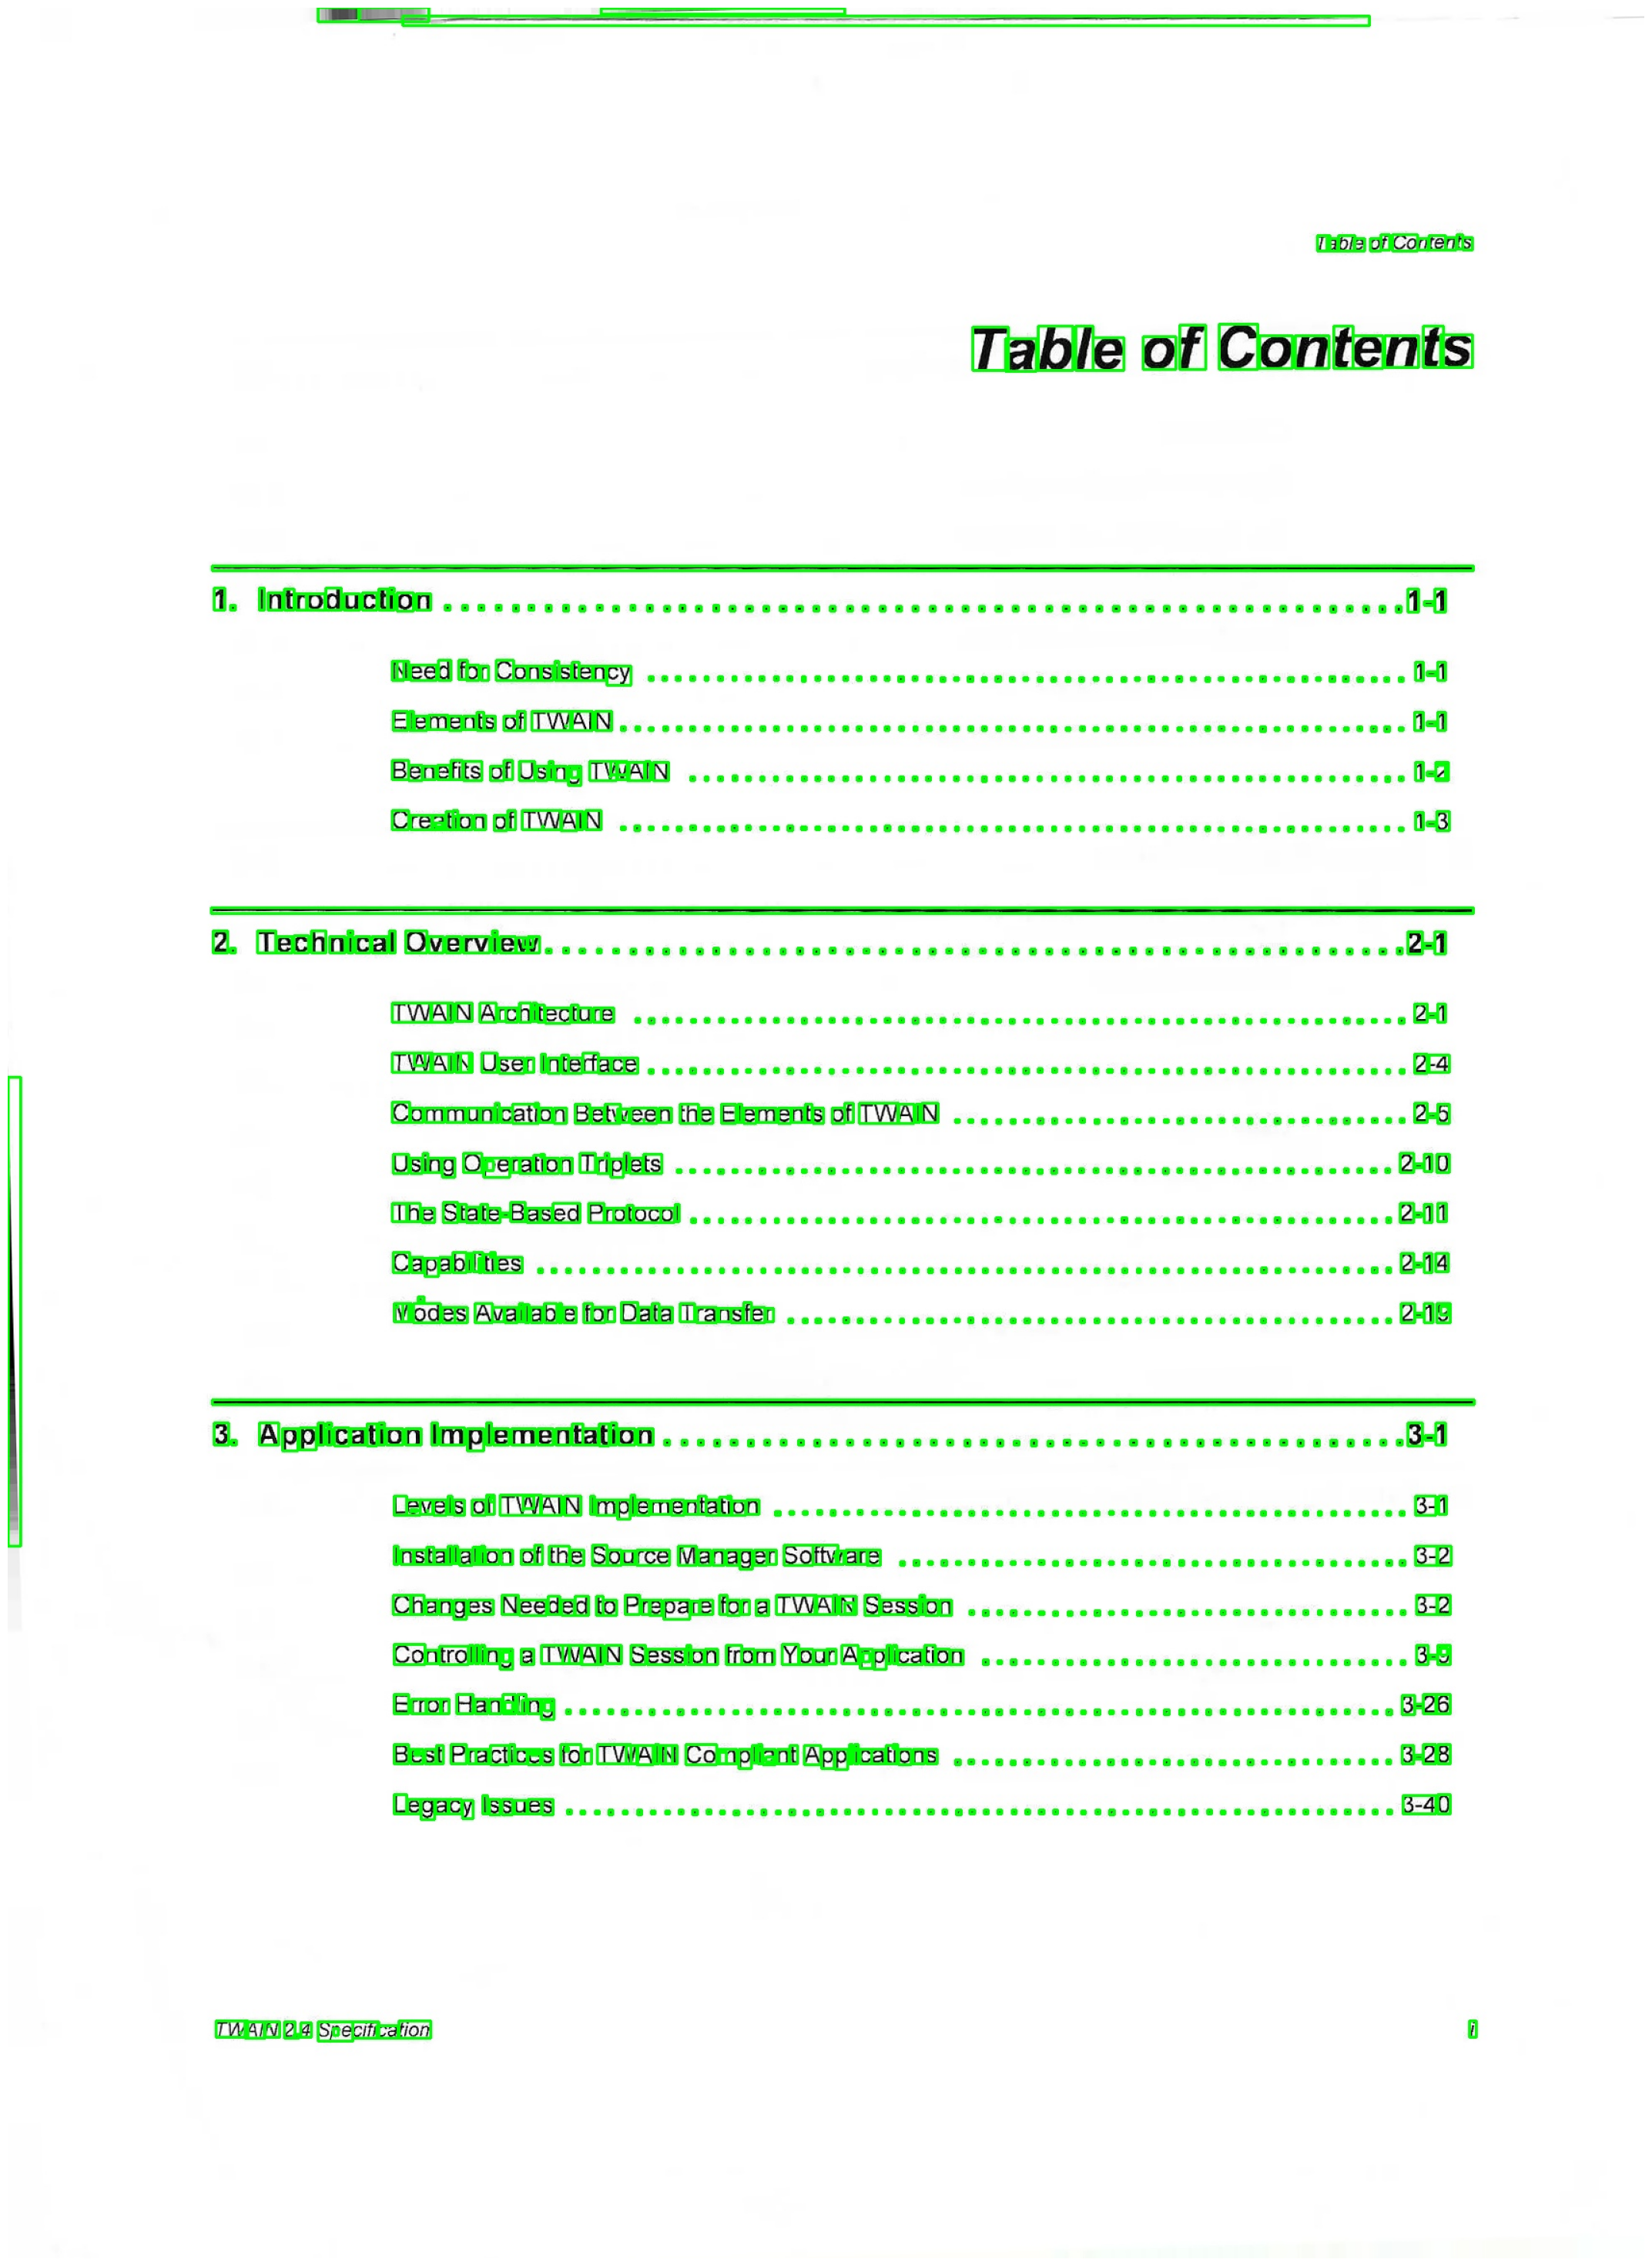

In [85]:
display('D:\\Project\\Data File\\Index_Bbox.jpg')